# Basic Cleaning

The data set contains errant data points including:
 - background noise: evidence by signals recieved outside of opening hours
 - signals recieved outside the mall
 - signals suggesting unrealistic pedestrian speeds
 - signals not moving or relatively stationary: shop workers

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

## Import data frame

In [2]:
shopper_df = pd.read_csv('../data/bag_mus_12-22-2016.csv')

# Turn date time to datetime64[ns] format
shopper_df.date_time = shopper_df.date_time.astype('datetime64[ns]')

## Background noise removing

In [13]:
signal_out_of_hours = shopper_df[shopper_df.date_time.dt.strftime('%H:%M:%S').between('00:00:00','08:00:00')]
mac_address_out_of_hours = signal_out_of_hours.mac_address.drop_duplicates().tolist()

In [15]:
shopper_no_noise_df = shopper_df[~shopper_df.mac_address.isin(mac_address_out_of_hours)]

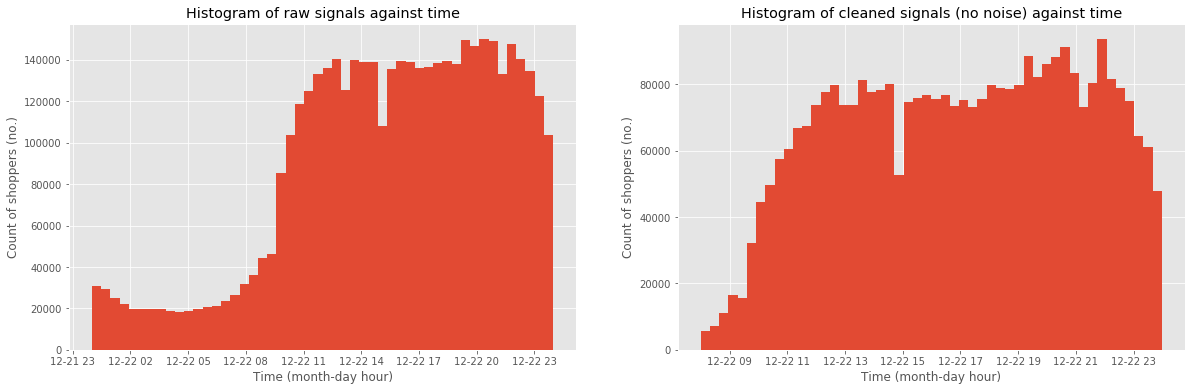

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax = shopper_df.date_time.hist(bins=50, ax=axes[0])
ax.set_title('Histogram of raw signals against time')
ax.set_xlabel('Time (month-day hour)')
ax.set_ylabel('Count of shoppers (no.)')

ax = shopper_no_noise_df.date_time.hist(bins=50, ax=axes[1])
ax.set_title('Histogram of cleaned signals (no noise) against time')
ax.set_xlabel('Time (month-day hour)')
ax.set_ylabel('Count of shoppers (no.)');

## Signals suggesting unrealistic pedestrian speeds